# Regression Example: Used Car Price Prediction

This notebook introduces the steps to build a regression model to predict the resale price of an used car.

### Dataset

**Filename**: final_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).


## 1. Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
cars_df = pd.read_csv('final_cars_maruti.csv')

In [4]:
cars_df.head(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [5]:
cars_df.shape

(1010, 11)

### Relationship between Age and Price

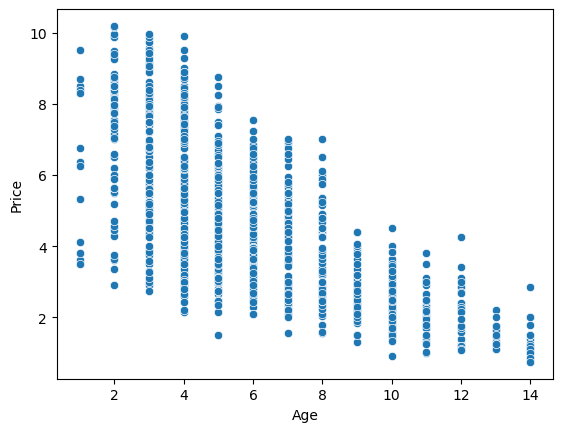

In [7]:
sn.scatterplot(data= cars_df,
               y = 'Price',
               x = 'Age');

## 2. Simple Linear Regression

Assumes linear relationship between features and outcome variable.

Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X$
									
- $\beta_{0}$ and $\beta_{1}$ are the regression coefficients
- $\hat{Y}$ is the predicted value of ${Y}$.


So, the error (Mean Squared Error) is:

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\hat{Y}))}^2$

or 

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$




Regression Explained: https://mlu-explain.github.io/linear-regression/

### Setting X and Y Variables

In [10]:
X = cars_df[['Age']]
y = cars_df.Price

### Splitting the dataset

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [15]:
X_train.shape

(808, 1)

In [16]:
X_test.shape

(202, 1)

In [17]:
X_train[0:5]

,Age
159,13
661,10
684,9
447,8
25,4


In [18]:
X_test[0:5]

,Age
249,6
596,6
539,4
904,7
479,2


### Building the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lreg_v1 = LinearRegression()

In [22]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Finding the model parameters

In [23]:
lreg_v1.intercept_

7.601234043261617

In [24]:
lreg_v1.coef_

array([-0.49082536])

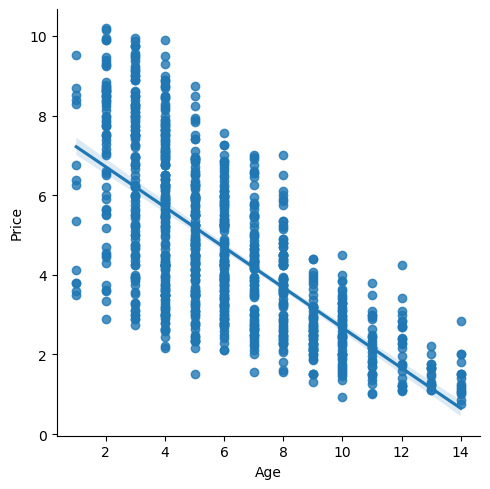

In [26]:
sn.lmplot(data = cars_df,
          y = 'Price',
          x = 'Age',
          fit_reg = True);

### Predicting on Test Set 

In [31]:
y_pred = lreg_v1.predict(X_test)

In [32]:
y_df = pd.DataFrame({ "actual" :y_test,
                      "predicted" : y_pred,
                      "residual" :y_test-y_pred})

In [33]:
y_df.sample(10)

,actual,predicted,residual
244,6.85,4.656282,2.193718
433,4.90,4.656282,0.243718
359,8.10,6.128758,1.971242
428,2.20,1.220504,0.979496
980,8.50,6.619583,1.880417
581,1.60,3.674631,-2.074631
207,6.24,6.128758,0.111242
716,8.20,5.637933,2.562067
861,2.19,2.202155,-0.012155
175,3.70,5.637933,-1.937933


### Error or Accuracy Analysis: RMSE

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [36]:
mse

2.5489881819990146

In [37]:
rmse = np.sqrt(mse)

In [38]:
rmse

1.5965550983285903

### What is R-quared?

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.

https://www.investopedia.com/terms/r/r-squared.asp


Total Variance in Y = $\sum_{i=1}^{N}(Y_{i} - \bar{Y})^2$ 

where, 

- $\bar{Y}$ is the mean of Y.

Unexplained Variance = $\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$  


$R^{2}$ is given by:

$R^{2}$ = $\frac{explained\ Variance}{Total\ Variance}$


Notes:

- R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
- What is a “good” R-squared value depends on the domain or context. In the field of social sciences, even a relatively low R-squared, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation. [Source](https://www.investopedia.com/terms/r/r-squared.asp)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_df.actual, y_df.predicted)

0.5257066204351252

### Participants Exercise: 1

Build a model by adding the following two parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven

In [41]:
X = cars_df[['Age', 'KM_Driven']]
y = cars_df.Price

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [44]:
X_train.shape

(808, 2)

In [45]:
X_test.shape

(202, 2)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lreg_v2 = LinearRegression()

In [48]:
lreg_v2.fit(X_train, y_train)

LinearRegression()

In [50]:
lreg_v2.intercept_

7.428471779478221

In [51]:
lreg_v2.coef_

array([-0.52790689,  0.00754463])

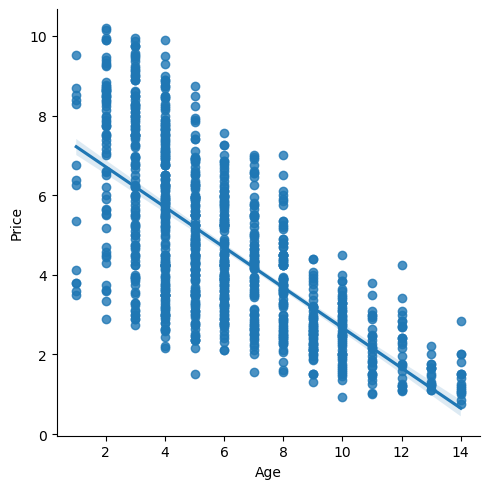

In [52]:
sn.lmplot(data = cars_df,
          y = 'Price',
          x = 'Age',
          fit_reg = True);

In [53]:
y_pred = lreg_v2.predict(X_test)

In [54]:
y_df = pd.DataFrame({ "actual" :y_test,
                      "predicted" : y_pred,
                      "residual" :y_test-y_pred})

In [56]:
y_df.sample(10)

,actual,predicted,residual
412,4.00,3.507219,0.492781
315,2.90,4.517548,-1.617548
116,4.90,5.264249,-0.364249
312,8.20,5.859840,2.340160
404,8.30,6.033367,2.266633
709,4.50,6.448104,-1.948104
207,6.24,6.101269,0.138731
445,5.80,5.611085,0.188915
771,4.25,5.882474,-1.632474
882,3.41,1.470821,1.939179


In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [59]:
mse

2.5599121733279535

In [60]:
rmse = np.sqrt(mse)

In [61]:
rmse

1.5999725539295833

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_df.actual, y_df.predicted)

0.5236739798751064

## 3. Building a model with more variables

Based on most important questions that customers ask

- Which model is it? (categorical feature)
- How old the vehicle is?
- How many kilometers it is driven?
    

### Feature Set Selection

### How to encode categorical variables?

OHE: One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

### Setting X and y variables

### Data Splitting

## 4. Multiple Linear Regression Model


Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$
									
- $\beta_{0}$, $\beta_{1}$...$\beta_{n}$  are the regression coefficients

### Understanding model parameters

### Predict on test set

### Measuring Accuracy

### Participants Exercise: 2

Build a model by adding the following five parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven
- Model
- Transmission Type
- Fuel Type

## 4. Building model with all the variables

### Feature Set Selection

### Encoding Categorical Variables


### Setting X and y variables

### Data Splitting

### Build Model

### Understanding model parameters

### Predict on test set

### Measuring Accuracy: RMSE and R2

### What are the reasons for the remaining error?

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Noise (randomness)
   

### Error Analysis: Deep Dive

### Participant Exercise: 3

Take different training set, build model and measure the model accuracy. But, how to sample differenent training and test sets?
- Change the random_state to different numbers while training and test splits and then measure the r2 values.
- Repeat the above process for 5 different random_states and make a note of the r2 values.

## 5. Storing the model